In [4]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'last' / 'last'

In [5]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])



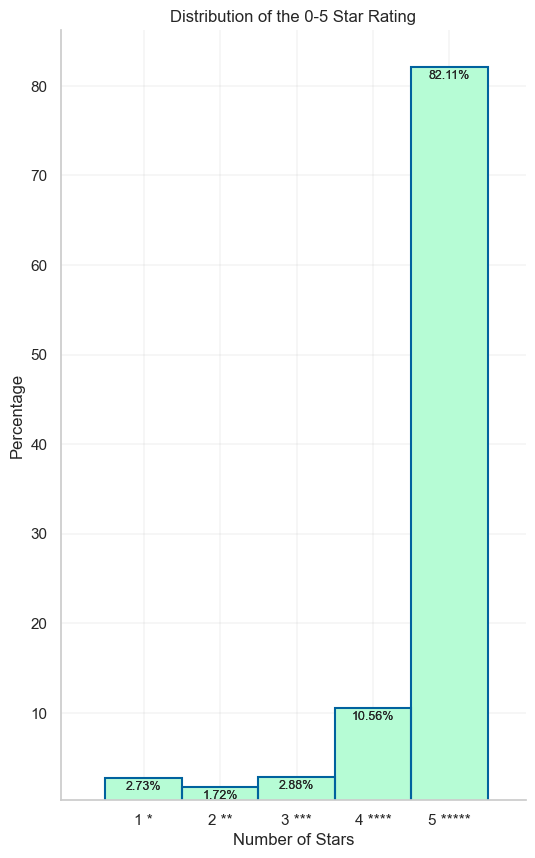

In [6]:
#Taking a general view about our reviews

width = 6
height = 10
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')


ax=sns.histplot(rb, x='rating_score', stat='percent', discrete=True, alpha=1, color='#b6fcd5')
ax=sns.histplot(rb, x='rating_score', stat='percent', discrete=True, alpha=1, fill=False, color='#00629e')
ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%',fontsize=9, padding=-11)
ax.set_xticks([1,2,3,4,5], labels=['1 *','2 **','3 ***','4 ****','5 *****'])

plt.title('Distribution of the 0-5 Star Rating')

#ax.set_xticks(range(len(df)), labels=range(2011, 2019))
ax.set(xlabel='Number of Stars', ylabel='Percentage')
plt.setp(ax.patches, linewidth=1.5 )

ax.set_ylim(ymin=0.25)
ax.set_xlim(xmin=-0.08,xmax=6)
sns.despine(top=True)


plt.show()

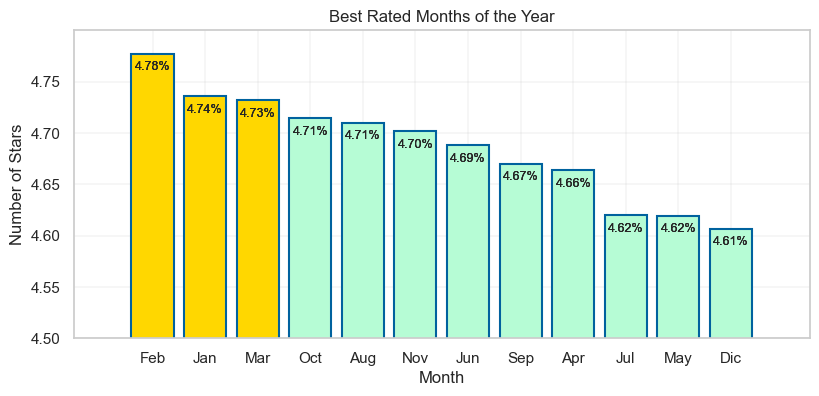

In [7]:
#Best Rated months 

#DATA
group = rb.groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
#g1

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%', padding=-14, fontsize=9)

ax.set_xticks(g1['pickup_date']-1, labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])#<-- This is improveable :( but for some reason it is not working intuitively.
ax.set_ylim(ymin=4.5 ,ymax=4.80)
ax.set(yticks=np.arange(4.5, 4.8, .05))
ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Best Rated Months of the Year')

ax.set(xlabel='Month', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


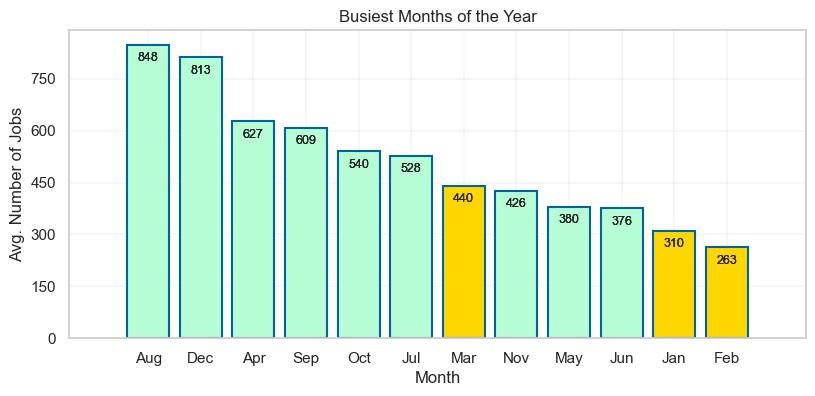

In [8]:
#What about the volume of work? What is the busiest month?

#DATA
group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g1=group.agg({'booking_id':['count']})
g1.index.rename(['year','month'], inplace=True) #Gold Nugget!!
g1.columns=['count']
g1.reset_index(inplace=True)
g1=g1.groupby('month')
g2=g1.agg({'count':['mean']})
g2.columns=['mean']
g2.sort_values(by='mean', ascending=False, inplace=True)
g2.reset_index(inplace=True)


#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#FFD700','#FFD700']

ax=sns.barplot(data=g2, x='month',y='mean',  fill=True, order=g2['month'])
ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g2['mean'],color=filledcolors)
ax=sns.barplot(data=g2, x='month',y='mean',  fill=False, order=g2['month'], color='#00629e')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
ax.set(yticks=np.arange(0, 850, 150))
ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Busiest Months of the Year')

ax.set(xlabel='Month', ylabel='Avg. Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()
#g2

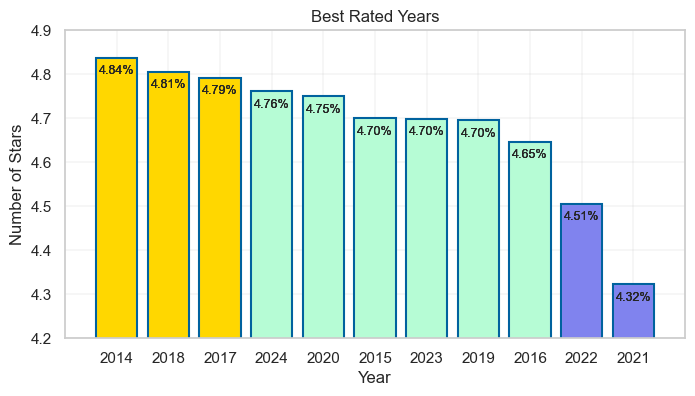

In [9]:
#Ranking of best Rated Year

#DATA
group = rb.groupby(rb['pickup_date'].dt.year)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#8083ee','#8083ee']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%', padding=-14, fontsize=9)

ax.set_ylim(ymin=4.2 ,ymax=4.9)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Best Rated Years')

ax.set(xlabel='Year', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


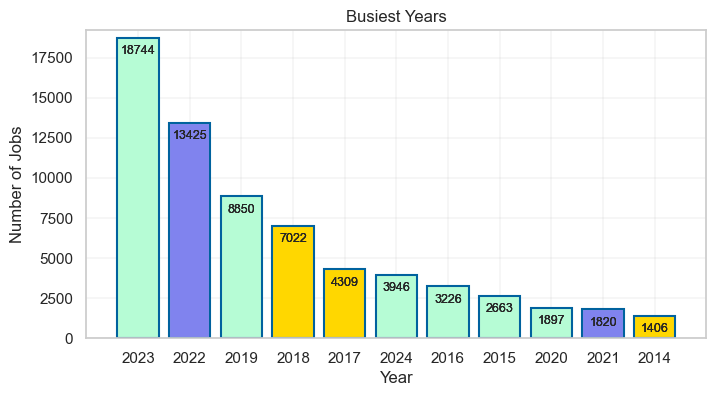

In [10]:
#Busiest Years

#DATA
group = book[book['pickup_date'].dt.year<2025].groupby(book['pickup_date'].dt.year)
g1=group.agg({'booking_id':['count']})
g1.columns=['count']
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#8083ee','#b6fcd5','#FFD700','#FFD700', '#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#8083ee','#FFD700']
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10],g1['count'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)

ax.set_ylim(ymin=0 ,ymax=19200)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Busiest Years')

ax.set(xlabel='Year', ylabel='Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


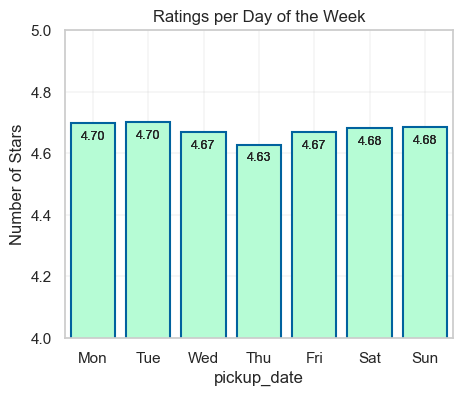

In [11]:
#What about the days? What is the highest rated day of the week?
#Worth checking the volume?
#Ranking of best Rated Year

#DATA
group = rb.groupby(rb['pickup_date'].dt.weekday)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
    
ax.set_xticks(g1['pickup_date'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings per Day of the Week')

ax.set(ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()



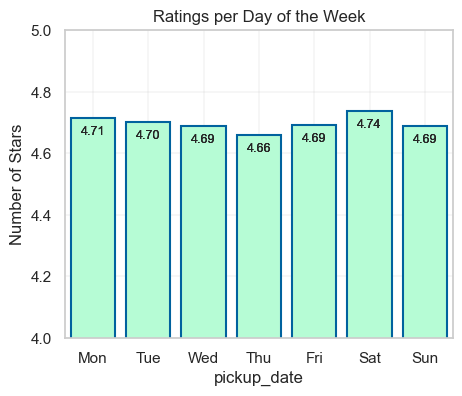

In [21]:
#Filtering for the Steady big years
#What about the days? What is the highest rated day of the week?
#Worth checking the volume?
#Ranking of best Rated Year

#DATA
group = rb[rb['pickup_date'].dt.year.isin([2023])].groupby(rb['pickup_date'].dt.weekday)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
    
ax.set_xticks(g1['pickup_date'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings per Day of the Week')

ax.set(ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()



In [13]:
def weekend(num):
    if int(num) <5:
        return 'Workday'
    else:
        return 'Weekend'
    
#DATA
rb_weekend=rb
rb_weekend['weekend']=rb['pickup_date'].apply(lambda x: weekend(x.dayofweek))

group = rb.groupby(rb['weekend'])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

,weekend,count,mean,sum,min,max,std
0,Weekend,6461,4.682247,30252,1,5,0.832640
1,Workday,13607,4.672962,63585,1,5,0.845333


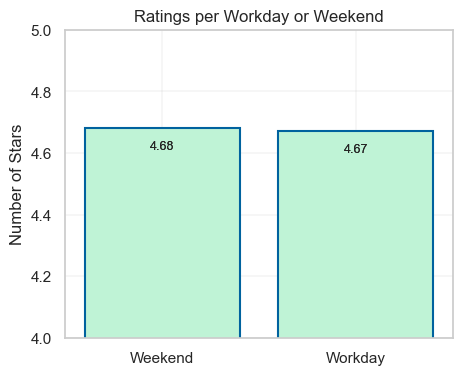

In [14]:
#WorkDay or Weekend?
#Worth checking the volume?
#Ranking of best Rated Year

def weekend(num):
    if int(num) <5:
        return 'Workday'
    else:
        return 'Weekend'
    
#DATA
rb_weekend=rb
rb_weekend['weekend']=rb['pickup_date'].apply(lambda x: weekend(x.dayofweek))

group = rb.groupby(rb['weekend'])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5']


ax=sns.barplot(data=g1, x='weekend',y='mean',  fill=True, order=g1['weekend'], color='#b6fcd5')
ax=sns.barplot(data=g1, x='weekend',y='mean',  fill=False, order=g1['weekend'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-18, fontsize=9)
    
#ax.set_xticks(g1['weekend'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings per Workday or Weekend')

ax.set(xlabel="", ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


<Axes: xlabel='count', ylabel='mean'>

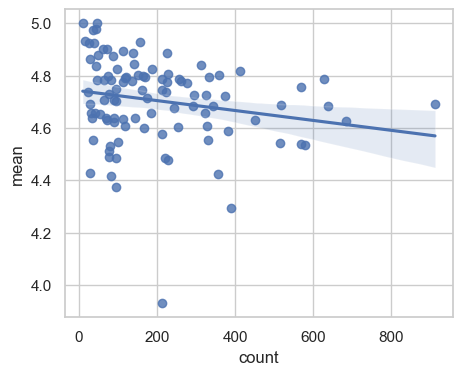

In [15]:
#REGPLOT
#Correlation Volume Year vs Rating
group = rb.groupby(rb['pickup_date'].dt.to_period('M'))
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]

sns.regplot(data=g1,x='count',y='mean', fit_reg=True)

<Axes: xlabel='count', ylabel='mean'>

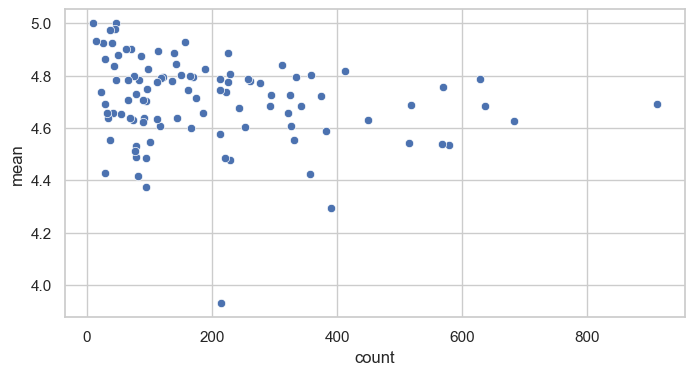

In [16]:
#Correlation Volume month vs Avg Rating in the Ratings Dataset
#No Hue. Keep it as well.
#DATA
group = rb.groupby(rb['pickup_date'].dt.to_period('M'))
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean')


'\nConclusion\nWhat I see here is that the Average Rating is 4.7 and the bigger the count\nis for a month, the stronger it is agains variations.\nBecause the ratings are discrete and go from 1 to 5. Being the average close to 4.7,\neverything that is not a 5 (closest value) is a big deviation, these deviations happen, \nhowever if it is a bigger work month they migth get compensated better.\nVehicles like Sedan and SUV6 have big volume to prove this.\n'

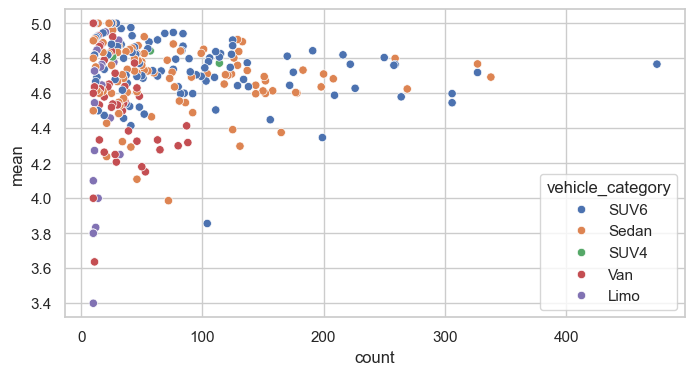

In [17]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('M'),rb['vehicle_category']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean', hue='vehicle_category')

'''
Conclusion
What I see here is that the Average Rating is 4.7 and the bigger the count
is for a month, the stronger it is agains variations.
Because the ratings are discrete and go from 1 to 5. Being the average close to 4.7,
everything that is not a 5 (closest value) is a big deviation, these deviations happen, 
however if it is a bigger work month they migth get compensated better.
Vehicles like Sedan and SUV6 have big volume to prove this.
'''

<Axes: xlabel='count', ylabel='mean'>

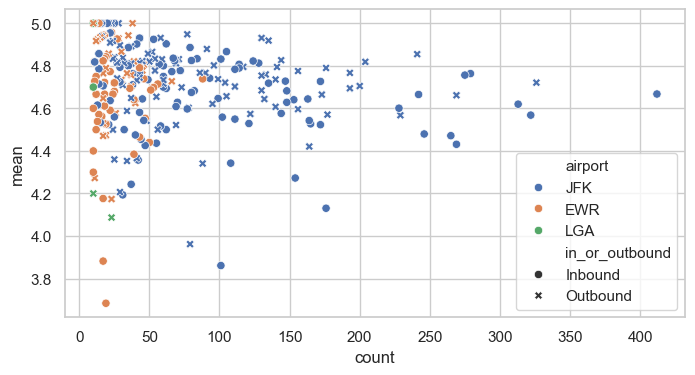

In [18]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('M'),rb['airport'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean', hue='airport', style='in_or_outbound')


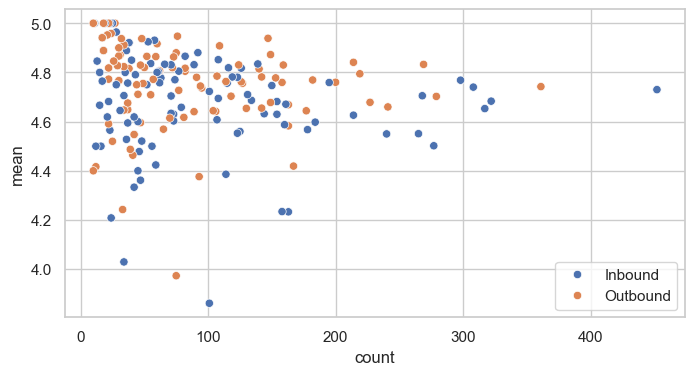

In [19]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb[rb['vehicle_category'].isin(['Sedan','SUV4','SUV6'])].groupby([rb['pickup_date'].dt.to_period('M'),rb['in_or_outbound']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean', hue='in_or_outbound')
plt.legend(loc='lower right')


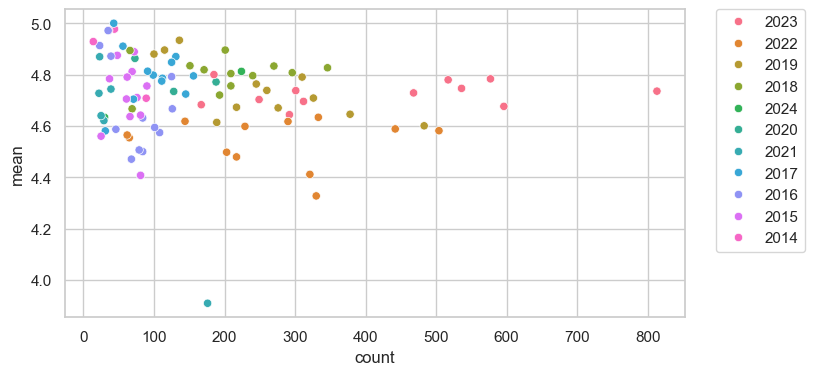

In [20]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb[rb['vehicle_category'].isin(['Sedan','SUV4','SUV6'])].groupby([rb['pickup_date'].dt.to_period('M'),rb['pickup_date'].dt.to_period('Y')])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1.index.rename(['month','year'], inplace=True)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean', hue='year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='lower right')
